# Instalación YFinance

In [ ]:
#!pip install yfinance --upgrade --no-cache-dir

# Estudio S&P500

## Cargamos las cotizaciones diarias del S&P500

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de fechas
start_date = '2004-01-01'
end_date = '2023-12-31'

# Descarga de las cotizaciones del S&P 500
ticker = "^GSPC"  # Este es el ticker del S&P 500 en Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)  # Especifica las fechas si quieres un rango en particular

# Muestra los primeros registros
data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,1108.479980,1153200000
2004-01-05,1108.479980,1122.219971,1108.479980,1122.219971,1122.219971,1578200000
2004-01-06,1122.219971,1124.459961,1118.439941,1123.670044,1123.670044,1494500000
2004-01-07,1123.670044,1126.329956,1116.449951,1126.329956,1126.329956,1704900000
2004-01-08,1126.329956,1131.920044,1124.910034,1131.920044,1131.920044,1868400000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


## Calculamos las rentabilidades diarias con el precio de cierre del S&P500


In [ ]:
# Calcular rentabilidad diaria
data['Daily Return'] = data['Adj Close'].pct_change()

# Muestra los primeros registros con las rentabilidades
data


,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,1108.479980,1153200000,NaN
2004-01-05,1108.479980,1122.219971,1108.479980,1122.219971,1122.219971,1578200000,0.012395
2004-01-06,1122.219971,1124.459961,1118.439941,1123.670044,1123.670044,1494500000,0.001292
2004-01-07,1123.670044,1126.329956,1116.449951,1126.329956,1126.329956,1704900000,0.002367
2004-01-08,1126.329956,1131.920044,1124.910034,1131.920044,1131.920044,1868400000,0.004963
...,...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000,0.001660
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000,0.004232
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000,0.001430


Vamos a comprobar que la función pct_change() nos calcula el cambio porcentual día a día. Para ello, aplicamos la fórmula habitual de rentabilidad:

In [ ]:
#Valor de cierre actual dividido por valor de cierre anterior, y restamos 1
data['Daily Return Check'] = (data['Adj Close'] / data['Adj Close'].shift(1)) - 1
data

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Daily Return Check
Date,,,,,,,,
2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,1108.479980,1153200000,NaN,NaN
2004-01-05,1108.479980,1122.219971,1108.479980,1122.219971,1122.219971,1578200000,0.012395,0.012395
2004-01-06,1122.219971,1124.459961,1118.439941,1123.670044,1123.670044,1494500000,0.001292,0.001292
2004-01-07,1123.670044,1126.329956,1116.449951,1126.329956,1126.329956,1704900000,0.002367,0.002367
2004-01-08,1126.329956,1131.920044,1124.910034,1131.920044,1131.920044,1868400000,0.004963,0.004963
...,...,...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000,0.001660,0.001660
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000,0.004232,0.004232
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000,0.001430,0.001430


Vemos pues que pct_change() nos saca la rentabilidad esperada.

## Graficamos las rentabilidades del S&P500


In [ ]:
# Crear un DataFrame solo con las rentabilidades diarias
df_rentabilidades = data[['Daily Return']].dropna()  # Eliminamos los valores NaN que resultan del pct_change()

# Muestra los primeros registros del DataFrame final
df_rentabilidades


,Daily Return
Date,
2004-01-05,0.012395
2004-01-06,0.001292
2004-01-07,0.002367
2004-01-08,0.004963
2004-01-09,-0.008888
...,...
2023-12-22,0.001660
2023-12-26,0.004232
2023-12-27,0.001430


In [ ]:
df_rentabilidades.describe()

,Daily Return
count,5032.000000
mean,0.000363
std,0.012046
min,-0.119841
25%,-0.004136
50%,0.000697
75%,0.005658
max,0.115800


Aquí podemos ver la máxima y mínima caída diaria.

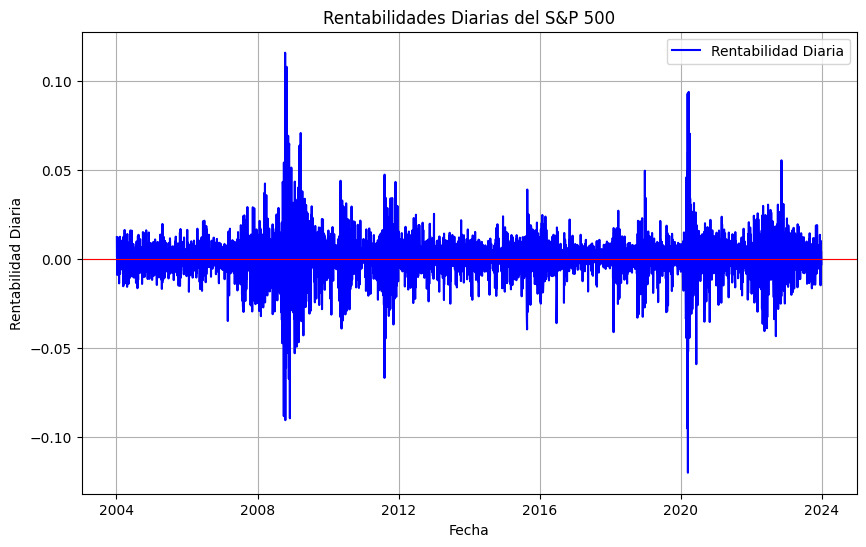

In [ ]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_rentabilidades.index, df_rentabilidades['Daily Return'], label='Rentabilidad Diaria', color='blue')
plt.title('Rentabilidades Diarias del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Diaria')
plt.axhline(0, color='red', linewidth=0.8)  # Línea horizontal en y=0 para referencia
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calcular la rentabilidad acumulada
rentabilidad_acumulada_sp500 = (1 + df_rentabilidades).cumprod() - 1
rentabilidad_acumulada_sp500

,Daily Return
Date,
2004-01-05,0.012395
2004-01-06,0.013704
2004-01-07,0.016103
2004-01-08,0.021146
2004-01-09,0.012071
...,...
2023-12-22,3.289324
2023-12-26,3.307475
2023-12-27,3.313637


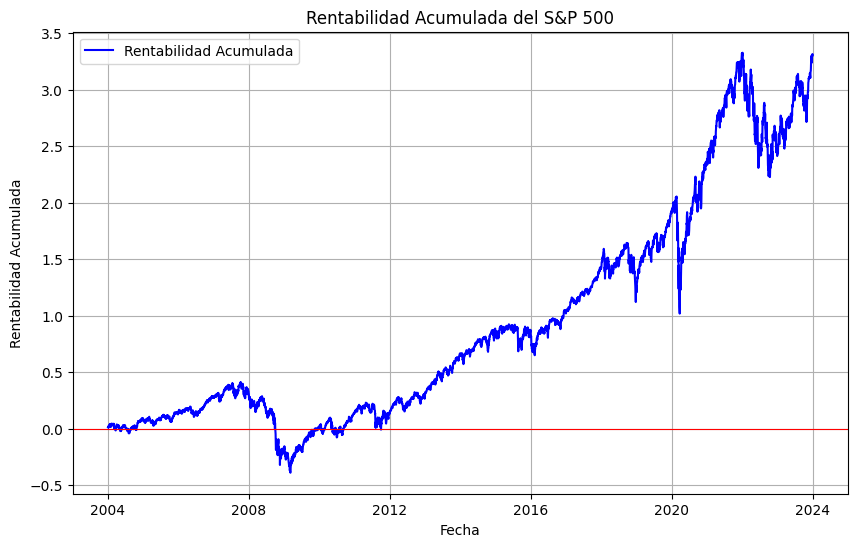

In [ ]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(rentabilidad_acumulada_sp500.index, rentabilidad_acumulada_sp500['Daily Return'], label='Rentabilidad Acumulada', color='blue')
plt.title('Rentabilidad Acumulada del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.axhline(0, color='red', linewidth=0.8)  # Línea horizontal en y=0 para referencia
plt.legend()
plt.grid(True)
plt.show()

# Estudio empresas del S&P500

## Cargamos las cotizaciones diarias de las empresas del S&P500


In [ ]:
# Descargar la lista de empresas del S&P 500
sp500_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [ ]:
sp500_tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
sp500_tickers_list = sp500_tickers.Symbol.to_list()

# Replace '.' with '-' porque vemos que BRK.B y BR.B dan error al descargar
sp500_tickers_list = [ticker.replace('.', '-') for ticker in sp500_tickers_list]

sp500_tickers_list


['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG'

In [ ]:
data = yf.download(sp500_tickers_list, start=start_date, end=end_date)['Adj Close']


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['GEV', 'SW', 'SOLV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1072933200, endDate = 1703998800")


In [ ]:
data

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,17.412888,NaN,0.320901,NaN,NaN,12.045959,4.488889,18.450762,19.518398,28.786577,...,57.311081,11.831409,15.400904,7.822359,20.590120,NaN,8.370542,61.195107,43.586666,NaN
2004-01-05,17.866346,NaN,0.334322,NaN,NaN,12.045959,4.455556,18.977510,19.867834,29.672993,...,57.460571,11.988179,15.585552,7.822359,21.071560,NaN,8.492870,60.644325,43.666668,NaN
2004-01-06,18.428637,NaN,0.333115,NaN,NaN,11.958348,4.450000,18.756840,19.887802,30.339363,...,58.191288,11.942067,15.352033,7.822359,20.929657,NaN,8.747507,60.347115,43.766666,NaN
2004-01-07,18.664444,NaN,0.340655,NaN,NaN,12.084609,4.441111,18.329733,19.694548,30.641129,...,58.706089,11.919937,15.487793,7.891502,20.777641,NaN,8.597720,61.020256,44.500000,NaN
2004-01-08,19.516949,NaN,0.352267,NaN,NaN,11.729021,4.481111,17.717564,18.975479,31.188072,...,56.912529,12.154171,15.417198,7.979080,20.726957,NaN,8.622680,62.200439,44.599998,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,138.850662,14.31,192.868134,150.669540,140.800003,107.400558,73.839996,350.262177,598.750000,195.398361,...,237.684387,33.787453,89.679138,60.272713,99.358162,112.019325,128.720108,119.827827,269.410004,193.525330
2023-12-26,139.089432,14.11,192.320221,150.358368,138.720001,107.597572,73.510002,349.254181,598.260010,197.153076,...,236.694382,34.052952,90.254387,60.457241,99.582405,112.993927,128.977539,120.923340,275.500000,194.041443
2023-12-27,139.099396,13.99,192.419830,150.611191,136.550003,108.149193,73.540001,349.639587,596.080017,197.628937,...,236.902298,34.180786,89.887413,60.271160,99.114426,113.749741,129.551819,120.634521,275.790009,195.431000


## Calculamos las rentabilidades diarias con el precio de cierre de cada una de  las empresas

In [ ]:
# Calcular la rentabilidad diaria para cada empresa
rentabilidades_diarias = data.pct_change()

# Muestra las primeras filas de las rentabilidades diarias
rentabilidades_diarias


<ipython-input-55-67c194d14ee2>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rentabilidades_diarias = data.pct_change()


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,0.026042,NaN,0.041824,NaN,NaN,0.000000,-0.007426,0.028549,0.017903,0.030793,...,0.002608,0.013250,0.011989,0.000000,0.023382,NaN,0.014614,-0.009000,0.001835,NaN
2004-01-06,0.031472,NaN,-0.003609,NaN,NaN,-0.007273,-0.001247,-0.011628,0.001005,0.022457,...,0.012717,-0.003846,-0.014983,0.000000,-0.006734,NaN,0.029982,-0.004901,0.002290,NaN
2004-01-07,0.012796,NaN,0.022635,NaN,NaN,0.010558,-0.001997,-0.022771,-0.009717,0.009946,...,0.008847,-0.001853,0.008843,0.008839,-0.007263,NaN,-0.017123,0.011154,0.016756,NaN
2004-01-08,0.045675,NaN,0.034086,NaN,NaN,-0.029425,0.009007,-0.033398,-0.036511,0.017850,...,-0.030552,0.019651,-0.004558,0.011098,-0.002439,NaN,0.002903,0.019341,0.002247,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.004534,-0.002787,-0.005547,0.015401,-0.009079,0.005070,-0.004315,0.016344,-0.002316,0.004178,...,0.007300,0.007329,-0.003307,0.008614,0.001769,0.008506,0.000154,0.007605,0.015454,0.001644
2023-12-26,0.001720,-0.013976,-0.002841,-0.002065,-0.014773,0.001834,-0.004469,-0.002878,-0.000818,0.008980,...,-0.004165,0.007858,0.006415,0.003062,0.002257,0.008700,0.002000,0.009142,0.022605,0.002667
2023-12-27,0.000072,-0.008505,0.000518,0.001681,-0.015643,0.005127,0.000408,0.001104,-0.003644,0.002414,...,0.000878,0.003754,-0.004066,-0.003078,-0.004699,0.006689,0.004453,-0.002388,0.001053,0.007161


## Graficamos las rentabilidades de todas las empresas


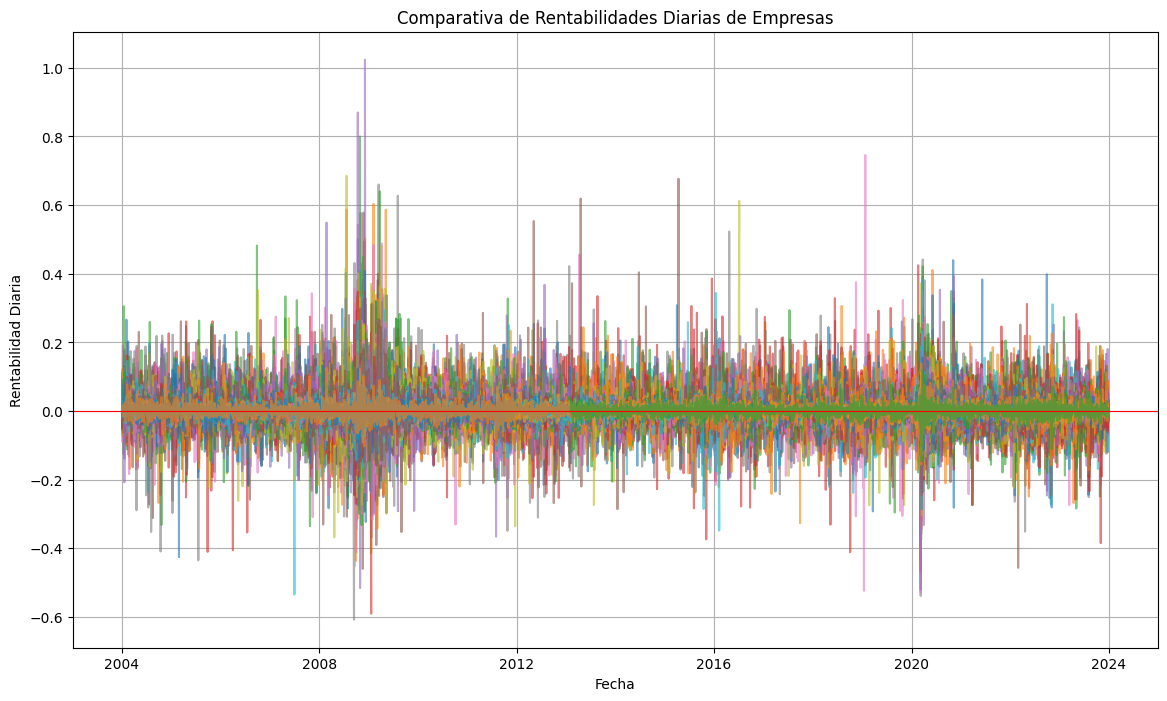

In [ ]:
# Graficar las rentabilidades diarias de todas las empresas
plt.figure(figsize=(14, 8))

for ticker in rentabilidades_diarias.columns:
    plt.plot(rentabilidades_diarias.index, rentabilidades_diarias[ticker], label=ticker, alpha=0.6)

plt.title('Comparativa de Rentabilidades Diarias de Empresas')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Diaria')
plt.axhline(0, color='red', linewidth=0.8)  # Línea horizontal en y=0 para referencia
#plt.legend(loc='upper left', fontsize='small', ncol=2)  # Ajusta el tamaño y la ubicación de la leyenda
plt.grid(True)
plt.show()


## Vamos a graficar las rentabilidades acumuladas

In [ ]:
# Calcular la rentabilidad acumulada para cada empresa
rentabilidad_acumulada_todas = (1 + rentabilidades_diarias).cumprod() - 1
rentabilidad_acumulada_todas

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,0.026042,NaN,0.041824,NaN,NaN,0.000000,-0.007426,0.028549,0.017903,0.030793,...,0.002608,0.013250,0.011989,0.000000,0.023382,NaN,0.014614,-0.009000,0.001835,NaN
2004-01-06,0.058333,NaN,0.038064,NaN,NaN,-0.007273,-0.008663,0.016589,0.018926,0.053941,...,0.015358,0.009353,-0.003173,0.000000,0.016490,NaN,0.045035,-0.013857,0.004130,NaN
2004-01-07,0.071875,NaN,0.061561,NaN,NaN,0.003209,-0.010644,-0.006560,0.009025,0.064424,...,0.024341,0.007483,0.005642,0.008839,0.009107,NaN,0.027140,-0.002857,0.020954,NaN
2004-01-08,0.120834,NaN,0.097745,NaN,NaN,-0.026311,-0.001733,-0.039738,-0.027816,0.083424,...,-0.006954,0.027280,0.001058,0.020035,0.006646,NaN,0.030122,0.016428,0.023249,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,6.974017,-0.213516,600.021494,5.910845,-0.027020,7.915900,15.449503,17.983616,29.676185,5.787829,...,3.147268,1.855742,4.822979,6.705184,3.825526,4.488382,14.377751,0.958128,5.181019,5.795800
2023-12-26,6.987729,-0.224508,598.314072,5.896572,-0.041393,7.932255,15.375989,17.928984,29.651081,5.848785,...,3.129993,1.878182,4.860331,6.728774,3.836417,4.536133,14.408506,0.976030,5.320740,5.813924
2023-12-27,6.988301,-0.231104,598.624478,5.908168,-0.056389,7.978048,15.382672,17.949873,29.539392,5.865316,...,3.133621,1.888987,4.836503,6.704986,3.813689,4.573164,14.477113,0.971310,5.327394,5.862719


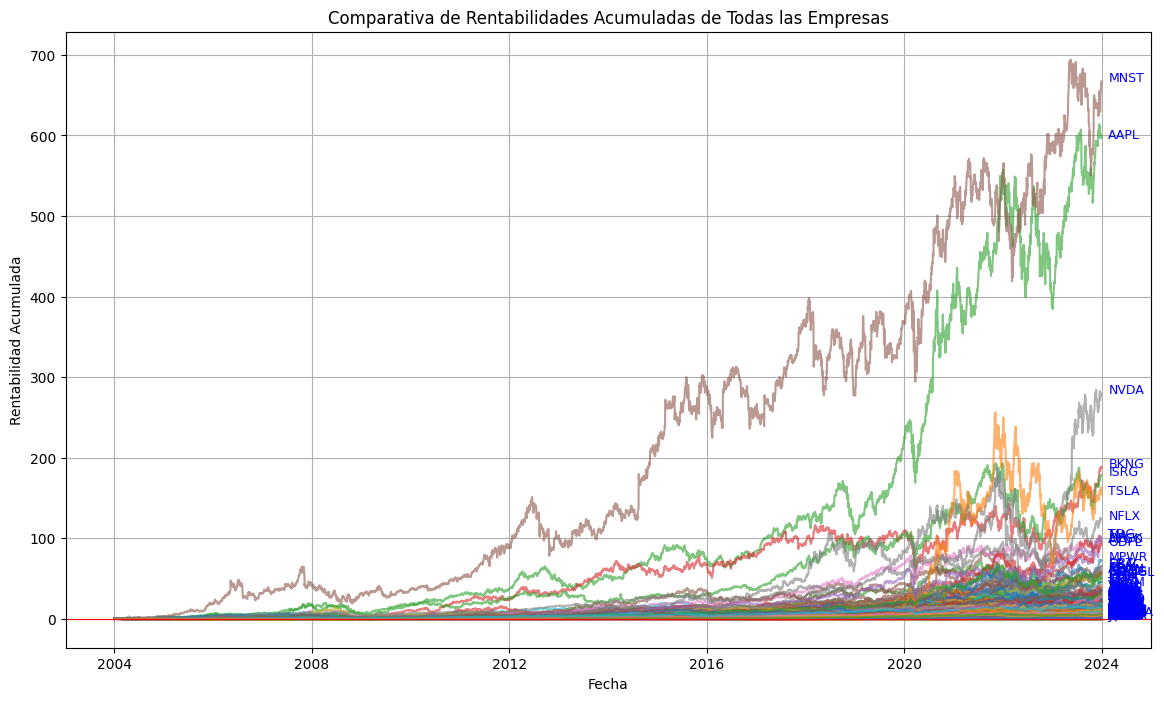

La empresa con mayor rentabilidad acumulada desde 2004-01-01 hasta 2023-12-31 es: MNST
Con una rentabilidad acumulada de: 66694.20%


In [ ]:

# Graficar las rentabilidades acumuladas de todas las empresas
plt.figure(figsize=(14, 8))

for ticker in rentabilidad_acumulada_todas.columns:
    plt.plot(rentabilidad_acumulada_todas.index, rentabilidad_acumulada_todas[ticker], label=ticker, alpha=0.6)

# Añadir etiquetas al final de cada línea
for ticker in rentabilidad_acumulada_todas.columns:
    plt.annotate(ticker,
                 xy=(rentabilidad_acumulada_todas.index[-1], rentabilidad_acumulada_todas[ticker].iloc[-1]),
                 xytext=(5, 0),
                 textcoords='offset points',
                 fontsize=9,
                 color='blue')

plt.title('Comparativa de Rentabilidades Acumuladas de Todas las Empresas')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.axhline(0, color='red', linewidth=0.8)  # Línea horizontal en y=0 para referencia
#plt.legend(loc='upper left', fontsize='small', ncol=2)  # Ajusta el tamaño y la ubicación de la leyenda
plt.grid(True)
plt.show()

# Obtener la rentabilidad acumulada final (hasta el 31 de diciembre de 2023)
final_cumulative_returns = rentabilidad_acumulada_todas.iloc[-1]

# Identificar la empresa con la mayor rentabilidad acumulada
most_profitable_company = final_cumulative_returns.idxmax()
highest_return = final_cumulative_returns.max()

print(f"La empresa con mayor rentabilidad acumulada desde {start_date} hasta {end_date} es: {most_profitable_company}")
print(f"Con una rentabilidad acumulada de: {highest_return:.2%}")

In [ ]:
rentabilidades_diarias["MNST"].describe()

,MNST
count,5032.000000
mean,0.001662
std,0.027267
min,-0.258385
25%,-0.009805
50%,0.000853
75%,0.011795
max,0.304815


In [ ]:
rentabilidades_diarias["AAPL"].describe()

,AAPL
count,5032.000000
mean,0.001487
std,0.020802
min,-0.179195
25%,-0.008436
50%,0.001137
75%,0.012002
max,0.139049


## Vamos a comparar con los sectores

In [ ]:
# Muestra los sectores
df_sectors = sp500_tickers[['Symbol', 'GICS Sector']]
df_sectors = df_sectors.rename(columns={'Symbol': 'Ticker'})
df_sectors = df_sectors.rename(columns={'GICS Sector': 'Sector'})

# Restablecer el índice actual para que 'index' sea una columna más
df_sectors = df_sectors.reset_index(drop=True)

# Establecer la columna 'Ticker' como el nuevo índice
df_sectors = df_sectors.set_index('Ticker')

# Muestra los sectores
df_sectors


,Sector
Ticker,
MMM,Industrials
AOS,Industrials
ABT,Health Care
ABBV,Health Care
ACN,Information Technology
...,...
XYL,Industrials
YUM,Consumer Discretionary
ZBRA,Information Technology


In [ ]:
rentT = rentabilidad_acumulada_todas.T
rentT = rentT.merge(df_sectors, on='Ticker')
#rentT = rentT.drop(columns=['Ticker'])
rentT


,2004-01-02 00:00:00,2004-01-05 00:00:00,2004-01-06 00:00:00,2004-01-07 00:00:00,2004-01-08 00:00:00,2004-01-09 00:00:00,2004-01-12 00:00:00,2004-01-13 00:00:00,2004-01-14 00:00:00,2004-01-15 00:00:00,...,2023-12-18 00:00:00,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,Sector
Ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,0.026042,0.058333,0.071875,0.120834,0.112848,0.125000,0.119445,0.115972,0.142708,...,6.857467,6.986586,6.894603,6.938023,6.974017,6.987729,6.988301,6.985444,6.956599,Health Care
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.217364,-0.214066,-0.231653,-0.211318,-0.213516,-0.224508,-0.231104,-0.231653,-0.244844,Industrials
AAPL,NaN,0.041824,0.038064,0.061561,0.097745,0.080826,0.115132,0.133458,0.137219,0.073779,...,607.130679,610.390367,603.839988,603.374237,600.021494,598.314072,598.624478,599.959441,596.699705,Information Technology
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.843048,5.851077,5.765884,5.806027,5.910845,5.896572,5.908168,5.902371,5.912183,Health Care
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.019280,0.015203,-0.025154,-0.018105,-0.027020,-0.041393,-0.056389,-0.053279,-0.059222,Consumer Discretionary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.394343,4.436734,4.343669,4.442094,4.488382,4.536133,4.573164,4.570240,4.572189,Industrials
YUM,NaN,0.014614,0.045035,0.027140,0.030122,0.018492,0.028930,0.018790,0.031912,0.031614,...,14.433349,14.406142,14.264191,14.375385,14.377751,14.408506,14.477113,14.439262,14.455823,Consumer Discretionary
ZBH,NaN,-0.009000,-0.013857,-0.002857,0.016428,0.012143,0.012143,-0.000572,0.000143,0.009429,...,0.929542,0.948545,0.949032,0.943348,0.958128,0.976030,0.971310,0.979447,0.980586,Health Care


In [ ]:
# Agrupar por sector y fecha y calcular la rentabilidad promedio

grouped_returns = rentT.groupby(['Sector']).mean() #.reset_index()

grouped_returnsT = grouped_returns.T

#grouped_returnsT.reset_index()

grouped_returnsT

Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,0.016262,0.009673,0.004954,0.021621,0.009966,-0.000130,0.009545,0.029687,0.023446,0.008369,-0.003119
2004-01-06,0.038739,0.015541,0.008129,0.021948,0.009800,0.000823,0.008018,0.037066,0.018047,0.013832,-0.005614
2004-01-07,0.046788,0.014815,0.004262,0.015043,0.010792,0.009515,0.010889,0.048821,0.015676,0.011387,0.001004
2004-01-08,0.059677,0.007275,0.001677,0.019554,0.012703,0.011541,0.014083,0.068592,0.028865,0.024348,0.003376
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,13.355002,20.903840,23.015236,6.823346,8.651432,15.121486,13.012541,29.039688,9.806187,10.589003,4.986426
2023-12-26,13.430491,20.984830,23.296235,6.907243,8.675552,15.195207,13.103873,29.192484,9.853090,10.674765,5.025155
2023-12-27,13.400644,21.033292,23.496152,6.864410,8.715029,15.243347,13.111351,29.193863,9.856592,10.741306,5.019188
2023-12-28,13.399673,20.919311,23.543957,6.755314,8.753237,15.278124,13.116825,29.209779,9.797951,10.800996,5.064447


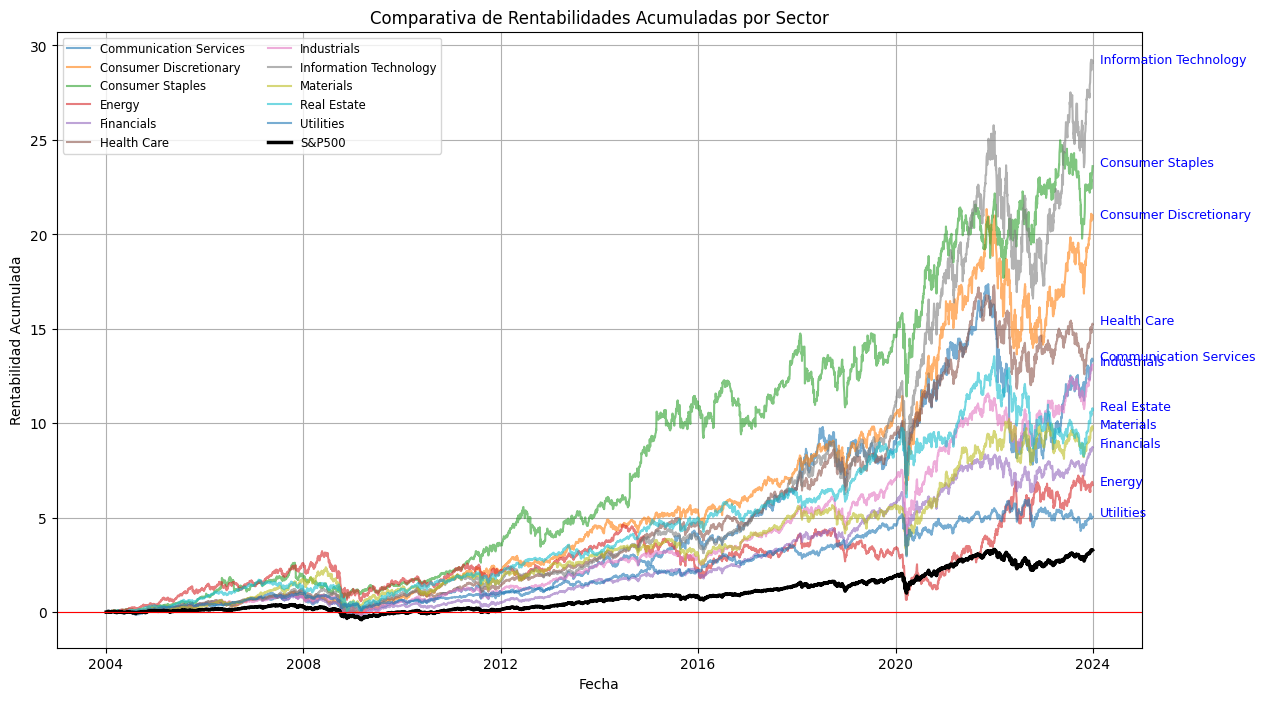

In [ ]:
# Graficar
plt.figure(figsize=(14, 8))

for sector in grouped_returnsT.columns:
    plt.plot(grouped_returnsT.index, grouped_returnsT[sector], label=sector, alpha=0.6)

plt.plot(rentabilidad_acumulada_sp500.index, rentabilidad_acumulada_sp500['Daily Return'], label='S&P500', color='black', linewidth=2.5)

# Añadir etiquetas al final de cada línea
for ticker in grouped_returnsT.columns:
    plt.annotate(ticker,
                 xy=(grouped_returnsT.index[-1], grouped_returnsT[ticker].iloc[-1]),
                 xytext=(5, 0),
                 textcoords='offset points',
                 fontsize=9,
                 color='blue')


plt.title('Comparativa de Rentabilidades Acumuladas por Sector')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.axhline(0, color='red', linewidth=0.8)  # Línea horizontal en y=0 para referencia
plt.legend(loc='upper left', fontsize='small', ncol=2)  # Ajusta el tamaño y la ubicación de la leyenda
plt.grid(True)
plt.show()

Vemos que la rentabilidad del S&P500 es menor que la rentabilidad de los sectores. Esta rentabilidad por sector, la hemos hecho considerando que todas las empresas tienen el mismo peso. Vamos a hacer la comparativa mejor con los índices sectoriales, que sí que están ponderados por tamaño, de forma similar al S&P500

# Estudio ETFs sectoriales

## Vamos a hacer la comparativa con ETFs sectoriales, que quizá sea más representativo


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


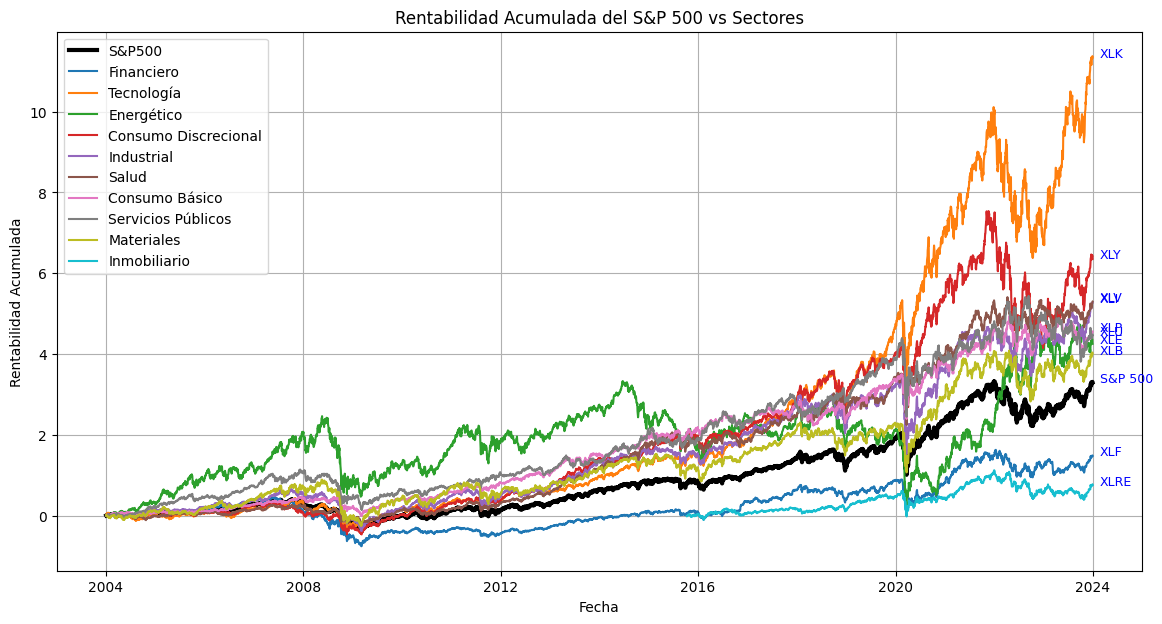

In [ ]:

# Descargar datos del S&P 500
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Descargar datos de los sectores: son ETFs que siguen los distintos sectores del S&P500
sectors = ['XLF', 'XLK', 'XLE', 'XLY', 'XLI', 'XLV', 'XLP', 'XLU', 'XLB', 'XLRE']
#XLF - Sector Financiero
#XLK - Sector de Tecnología
#XLE - Sector Energético
#XLY - Sector de Consumo Discrecional
#XLI - Sector Industrial
#XLV - Sector de Salud
#XLP - Sector de Consumo Básico
#XLU - Sector de Servicios Públicos
#XLB - Sector de Materiales
#XLRE - Sector Inmobiliario

sector_data = {sector: yf.download(sector, start=start_date, end=end_date)['Adj Close'] for sector in sectors}

# Crear un DataFrame con todos los datos
data = pd.DataFrame({'S&P 500': sp500})
for sector, prices in sector_data.items():
    data[sector] = prices

# Calcular la rentabilidad acumulada
returns = data.pct_change() #.dropna()
cumulative_returns = (1 + returns).cumprod() - 1

# Graficar la rentabilidad acumulada
plt.figure(figsize=(14, 7))
#for column in cumulative_returns.columns:
#    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

# Graficar la línea del S&P 500 resaltada
plt.plot(cumulative_returns.index, cumulative_returns['S&P 500'], label='S&P 500', color='black', linewidth=3)

# Graficar las líneas de los sectores
for column in cumulative_returns.columns:
    if column != 'S&P 500':
        plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, linewidth=1.5)

# Añadir etiquetas al final de cada línea
for ticker in cumulative_returns.columns:
    plt.annotate(ticker,
                 xy=(cumulative_returns.index[-1], cumulative_returns[ticker].iloc[-1]),
                 xytext=(5, 0),
                 textcoords='offset points',
                 fontsize=9,
                 color='blue')




plt.title('Rentabilidad Acumulada del S&P 500 vs Sectores')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.legend(['S&P500', 'Financiero','Tecnología','Energético','Consumo Discrecional','Industrial','Salud','Consumo Básico','Servicios Públicos','Materiales','Inmobiliario'])
plt.grid(True)
plt.show()


In [ ]:
# Descargar los datos del S&P 500 desde 01-01-2020 hasta 01-01-2024
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

# Calcular la rentabilidad acumulada simple
precio_inicial = sp500['Adj Close'].iloc[0]
precio_final = sp500['Adj Close'].iloc[-1]
rentabilidad_acumulada_simple = (precio_final - precio_inicial) / precio_inicial

# Mostrar la rentabilidad acumulada simple
print(f"La rentabilidad acumulada simple del S&P 500 desde {start_date} hasta {end_date} es: {rentabilidad_acumulada_simple:.2%}")


[*********************100%%**********************]  1 of 1 completed

La rentabilidad acumulada simple del S&P 500 desde 2004-01-01 hasta 2023-12-31 es: 330.30%


In [ ]:
cumulative_returns

,S&P 500,XLF,XLK,XLE,XLY,XLI,XLV,XLP,XLU,XLB,XLRE
Date,,,,,,,,,,,
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,0.012395,0.008188,0.024413,0.019245,0.008648,0.009724,0.004633,0.006506,0.001720,0.020331,NaN
2004-01-06,0.013704,0.007832,0.033691,0.018155,0.012492,0.008228,0.007611,0.008828,-0.000430,0.011295,NaN
2004-01-07,0.016103,0.008544,0.038574,0.007625,0.016977,0.009724,0.013898,0.004647,0.004727,0.006023,NaN
2004-01-08,0.021146,0.012104,0.059082,0.010530,0.013773,0.016081,0.009596,0.003253,0.004298,0.017318,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,3.289324,1.471913,11.302739,4.329346,6.386832,5.229150,5.237913,4.497471,4.415939,4.007114,0.751290
2023-12-26,3.307475,1.481844,11.353987,4.375126,6.418112,5.273200,5.251772,4.520627,4.448805,4.030512,0.764073
2023-12-27,3.313637,1.489788,11.353346,4.351296,6.443629,5.282560,5.278106,4.546100,4.445345,4.042796,0.774211


## Vamos a estudiar también la volatilidad y ratio sharpe

In [ ]:
# Lista de tickers de los ETFs sectoriales del S&P 500
sectors = {
    'XLF': 'Financiero',
    'XLK': 'Tecnología',
    'XLE': 'Energético',
    'XLY': 'Consumo Discrecional',
    'XLI': 'Industrial',
    'XLV': 'Salud',
    'XLP': 'Consumo Básico',
    'XLU': 'Servicios Públicos',
    'XLB': 'Materiales',
    'XLRE': 'Inmobiliario'
}

# Descargar los datos para los ETFs sectoriales
sector_data = {ticker: yf.download(ticker, start=start_date, end=end_date)['Adj Close'] for ticker in sectors}

# Calcular la volatilidad diaria del S&P 500
sp500_returns = sp500.pct_change().dropna()
sp500_volatility_daily = sp500_returns.std()

# Calcular la volatilidad diaria y anualizada para cada sector
sector_volatilities = {}

for ticker, name in sectors.items():
    returns = sector_data[ticker].pct_change().dropna()
    volatility_daily = returns.std()
    volatility_annual = volatility_daily * np.sqrt(252)
    sector_volatilities[name] = volatility_annual

# Calcular la volatilidad anualizada del S&P 500
sp500_volatility_annual = sp500_volatility_daily * np.sqrt(252)

# Crear un DataFrame para comparar
volatility_comparison = pd.DataFrame.from_dict(sector_volatilities, orient='index', columns=['Volatilidad Anualizada'])
volatility_comparison.loc['S&P 500'] = sp500_volatility_annual

# Ordenar por volatilidad
volatility_comparison = volatility_comparison.sort_values(by='Volatilidad Anualizada', ascending=False)

print(volatility_comparison)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                      Volatilidad Anualizada
Energético                          0.301553
Financiero                          0.295595
Materiales                          0.235549
Tecnología                          0.218952
Consumo Discrecional                0.216571
Inmobiliario                        0.213840
Industrial                          0.209198
Servicios Públicos                  0.186648
Salud                               0.167054
Consumo Básico                      0.140991
S&P 500                                  NaN


Los sectores con mayor volatilidad, ofrecen mayores oportunidades de rentabilidad pero también conllevan mayor riesgo. Los sectores con menor volatilidad, son más estables y suelen ser considerados refugios en tiempos de incertidumbre económica.

[*********************100%%**********************]  11 of 11 completed


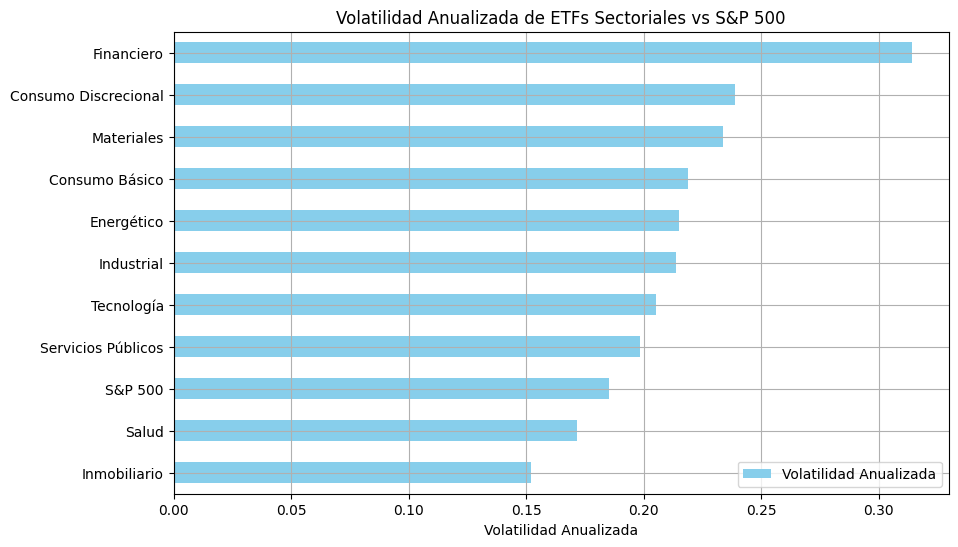

In [ ]:
# Definir los tickers de los ETFs sectoriales y del S&P 500
tickers = ['XLE', 'XLF', 'XLB', 'XLK', 'XLY', 'XLRE', 'XLI', 'XLU', 'XLV', 'XLP', '^GSPC']


data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calcular la rentabilidad diaria
returns = data.pct_change().dropna()

# Calcular la volatilidad anualizada
annualized_volatility = returns.std() * np.sqrt(252)

# Crear un DataFrame para la visualización
vol_df = pd.DataFrame(annualized_volatility, columns=['Volatilidad Anualizada'])
vol_df.index = ['Energético', 'Financiero', 'Materiales', 'Tecnología', 'Consumo Discrecional',
                'Inmobiliario', 'Industrial', 'Servicios Públicos', 'Salud', 'Consumo Básico', 'S&P 500']
vol_df.sort_values(by="Volatilidad Anualizada", inplace=True)

# Graficar
plt.figure(figsize=(10, 6))
vol_df['Volatilidad Anualizada'].plot(kind='barh', color='skyblue')
plt.xlabel('Volatilidad Anualizada')
plt.title('Volatilidad Anualizada de ETFs Sectoriales vs S&P 500')
plt.legend()
plt.grid(True)
plt.show()



# Hacemos estudio de las 10 empresas con mayor capitalización de mercado del S&P500, y añadimos también MSNT

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


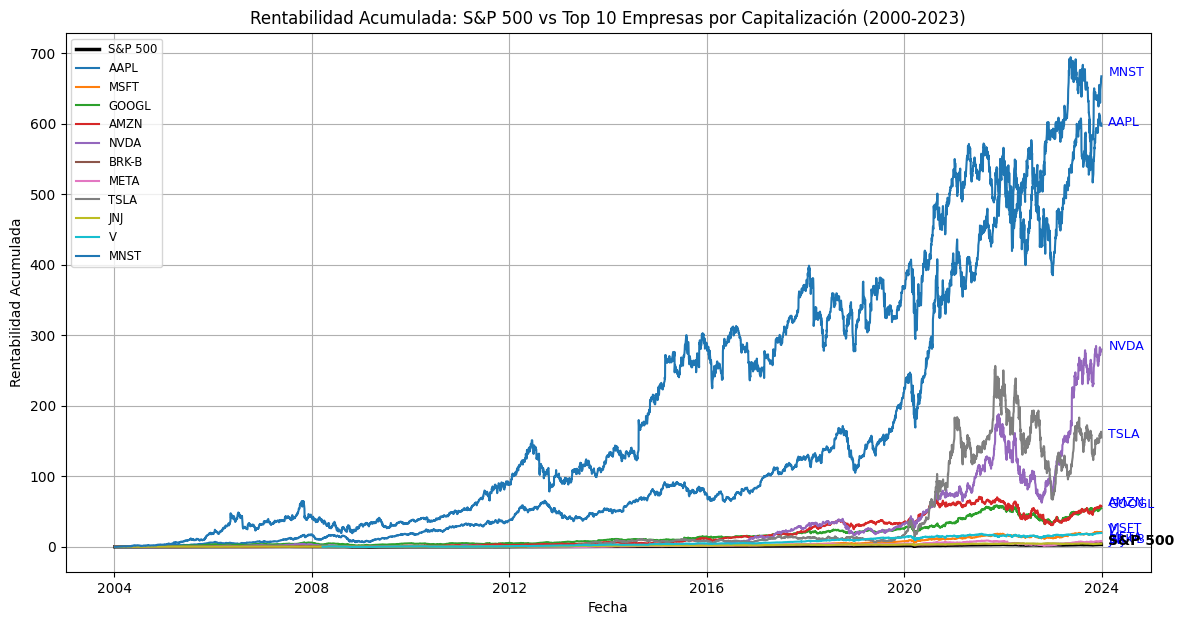

In [ ]:
# Tickers de las 10 empresas de mayor capitalización de mercado (Ejemplo: Apple, Microsoft, etc.)
top_10_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'BRK-B', 'META', 'TSLA', 'JNJ', 'V', 'MNST']

# Descargar datos históricos del S&P 500
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Descargar datos históricos de las 10 empresas de mayor capitalización de mercado
top_10_data = {ticker: yf.download(ticker, start=start_date, end=end_date)['Adj Close'] for ticker in top_10_tickers}

# Calcular la rentabilidad diaria y acumulada para el S&P 500
sp500_returns = sp500.pct_change().dropna()
sp500_cumulative = (1 + sp500_returns).cumprod() - 1

# Calcular la rentabilidad diaria y acumulada para cada una de las 10 empresas
top_10_cumulative = pd.DataFrame()

for ticker, prices in top_10_data.items():
    returns = prices.pct_change().dropna()
    cumulative_returns = (1 + returns).cumprod() - 1
    top_10_cumulative[ticker] = cumulative_returns

# Graficar la rentabilidad acumulada del S&P 500 y las 10 empresas
plt.figure(figsize=(14, 7))

# Graficar S&P 500
plt.plot(sp500_cumulative.index, sp500_cumulative, label='S&P 500', linewidth=2.5, color='black')

# Graficar las 10 empresas de mayor capitalización
for ticker in top_10_tickers:
    plt.plot(top_10_cumulative.index, top_10_cumulative[ticker], label=ticker)

    # Añadir etiquetas al final de cada línea
for ticker in top_10_cumulative.columns:
    plt.annotate(ticker,
                 xy=(top_10_cumulative.index[-1], top_10_cumulative[ticker].iloc[-1]),
                 xytext=(5, 0),
                 textcoords='offset points',
                 fontsize=9,
                 color='blue')

# Etiqueta para el S&P 500
plt.annotate('S&P 500',
             xy=(sp500_cumulative.index[-1], sp500_cumulative.iloc[-1]),
             xytext=(5, 0),
             textcoords='offset points',
             fontsize=10,
             color='black',
             weight='bold')

plt.title('Rentabilidad Acumulada: S&P 500 vs Top 10 Empresas por Capitalización (2000-2023)')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()


[*********************100%%**********************]  11 of 11 completed


Sharpe Ratio del S&P 500: 0.4257960232350983
Sharpe Ratios de las 10 empresas con mayor capitalización:
Ticker
MNST     0.567420
JNJ      0.645347
META     0.654444
BRK-B    0.738637
GOOGL    0.807697
AMZN     0.838168
AAPL     0.861478
V        0.899523
MSFT     0.993979
TSLA     1.012804
NVDA     1.209416
dtype: float64


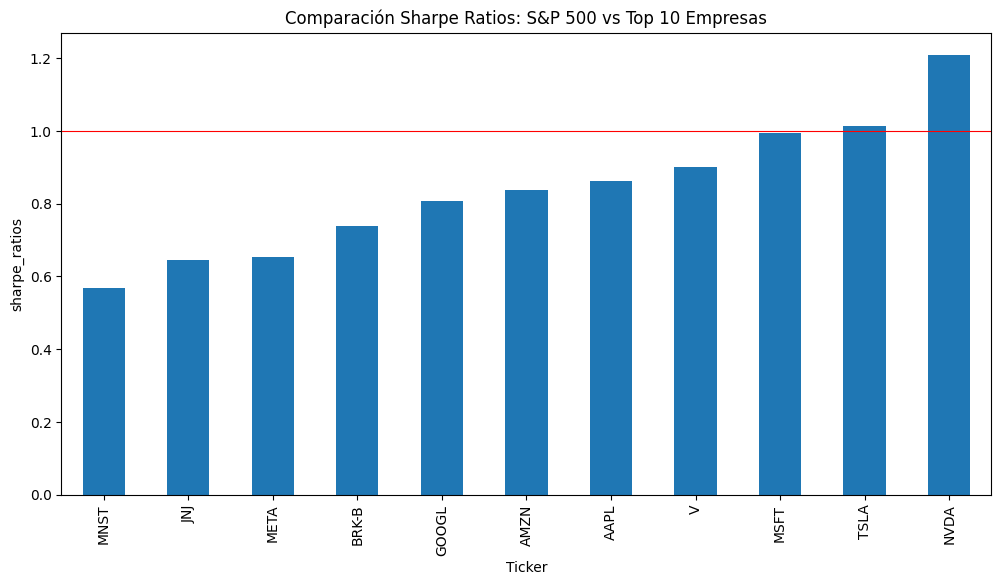

In [ ]:

data = yf.download(top_10_tickers, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()

def sharpe_ratio(returns, risk_free_rate=0.01):
    excess_returns = returns - risk_free_rate / 252
    annualized_sharpe = np.sqrt(252) * excess_returns.mean() / excess_returns.std()
    return annualized_sharpe

sharpe_ratios = returns.apply(sharpe_ratio)
sp500_sharpe = sharpe_ratio(sp500_returns)
print("Sharpe Ratio del S&P 500:", sp500_sharpe)
print("Sharpe Ratios de las 10 empresas con mayor capitalización:")

#Ordenamos de menor a mayor
sharpe_ratios.sort_values(inplace=True)
print(sharpe_ratios)


# Graficar la volatilidad
sharpe_ratios.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación Sharpe Ratios: S&P 500 vs Top 10 Empresas')
plt.ylabel('sharpe_ratios')
plt.axhline(1, color='red', linewidth=0.8)  # Línea horizontal en y=1 para referencia
plt.show()



Ratio de Sharpe > 1: Indica que la inversión tiene un buen rendimiento ajustado al riesgo. Cuanto mayor sea el ratio, mejor.

Ratio de Sharpe = 1: La inversión tiene un rendimiento ajustado al riesgo aceptable.

Ratio de Sharpe < 1: La inversión tiene un rendimiento ajustado al riesgo inferior al esperado.

Así pues NVIDIA es la que mejor rendimiento ajustado a riesgo tiene, y MNST la que peor, a pesar de ser la más rentable del grupo.

         Volatilidad
Ticker              
JNJ         0.172831
BRK-B       0.186070
S&P 500     0.191230
V           0.242708
MSFT        0.265919
GOOGL       0.271109
AAPL        0.284094
MNST        0.313257
AMZN        0.323473
META        0.401306
NVDA        0.441624
TSLA        0.564882


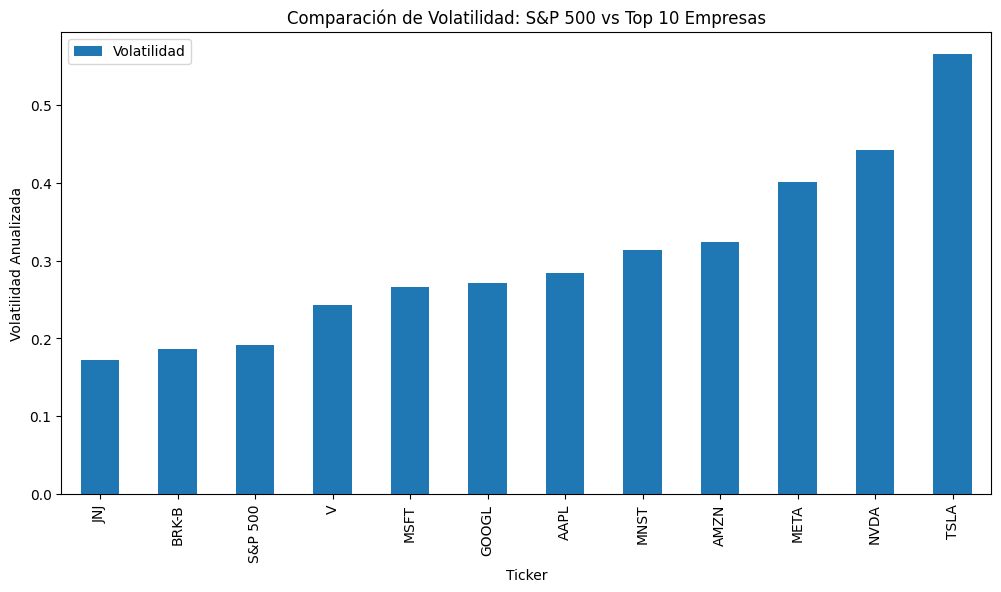

In [ ]:

# Calcular la volatilidad (desviación estándar de los retornos)
sp500_volatility = sp500_returns.std() * np.sqrt(252)
top_10_volatility = returns.std() * np.sqrt(252)

# Crear un DataFrame para comparar
volatility_comparison = pd.DataFrame({'Volatilidad': top_10_volatility})
volatility_comparison.loc['S&P 500'] = sp500_volatility

# Mostrar los resultados
volatility_comparison.sort_values(by="Volatilidad",inplace=True)
print(volatility_comparison)

# Graficar la volatilidad
volatility_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Volatilidad: S&P 500 vs Top 10 Empresas')
plt.ylabel('Volatilidad Anualizada')
plt.show()


TSLA es la más volátil, lo que sugiere que su precio es más variable y, por tanto, es una inversión más arriesgada, y S&P500, BRK-B y JNJ las que menos volatilidad tienen, indicando que su precio es más estable y por tanto presentan un menor riesgo.

# Comparar diferentes carteras con el S&P500

In [ ]:
# Función que nos permita crear fácilmente diferentes comparativas de carteras
def comparar_rentabilidad(tickers, start_date, end_date):
    """
    Compara la rentabilidad acumulada de una cartera equiponderada de las empresas en 'tickers'
    con la rentabilidad acumulada del S&P 500.

    Parámetros:
    tickers (list): Lista de símbolos de las acciones (sin incluir '^GSPC' para el S&P 500).
    start_date (str): Fecha de inicio en formato 'YYYY-MM-DD'.
    end_date (str): Fecha de fin en formato 'YYYY-MM-DD'.
    """

    # Añadir el S&P 500 a la lista de tickers
    tickers.append('^GSPC')

    # Descargar los datos
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

    # Calcular la rentabilidad diaria
    returns = data.pct_change().dropna()

    # Crear una cartera equiponderada
    weights = np.ones(len(tickers) - 1) / (len(tickers) - 1)  # (len(tickers) - 1) porque excluimos el S&P 500
    cartera_returns = returns.iloc[:, :-1].dot(weights)  # Excluye el S&P 500 de la cartera

    # Calcular la rentabilidad acumulada
    cartera_cumulative_returns = (1 + cartera_returns).cumprod() - 1
    sp500_cumulative_returns = (1 + returns['^GSPC']).cumprod() - 1


    # Graficar la rentabilidad acumulada
    plt.figure(figsize=(10, 6))
    plt.plot(cartera_cumulative_returns.index, cartera_cumulative_returns, label='Cartera Equiponderada')
    plt.plot(sp500_cumulative_returns.index, sp500_cumulative_returns, label='S&P 500')
    plt.title('Rentabilidad Acumulada: Cartera Equiponderada vs S&P 500')
    plt.xlabel('Fecha')
    plt.ylabel('Rentabilidad Acumulada')
    plt.legend()
    plt.grid(True)
    plt.show()




[*********************100%%**********************]  9 of 9 completed


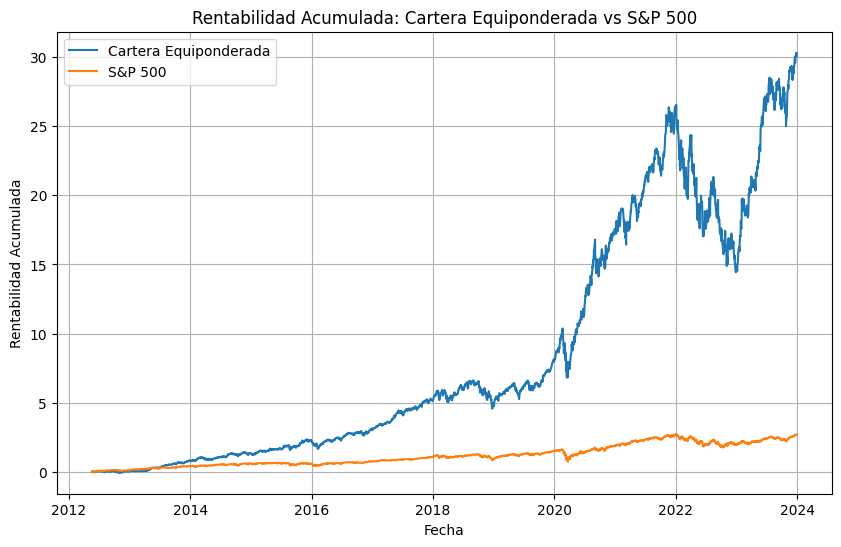

In [ ]:
tickers_top = ['NVDA', 'TSLA', 'MSFT', 'AAPL', 'AMZN', 'GOOGL', 'META', 'MNST']
comparar_rentabilidad(tickers_top,start_date, end_date )

[*********************100%%**********************]  9 of 9 completed


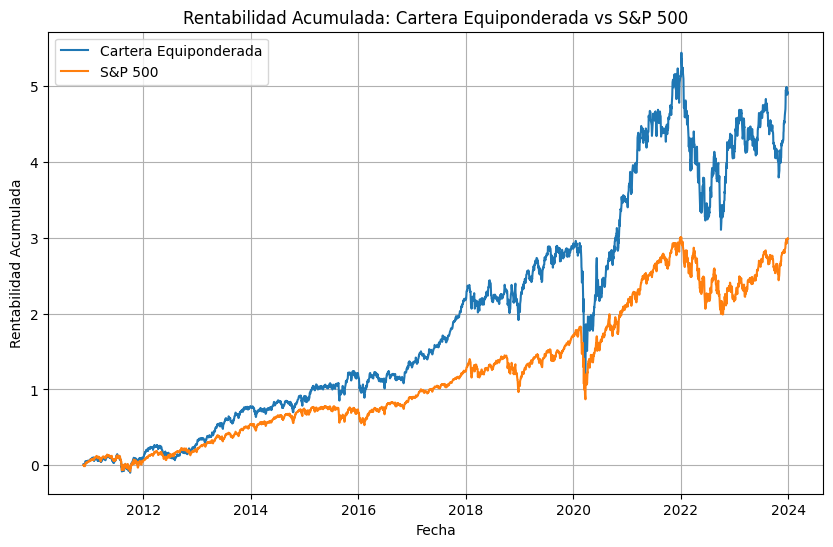

In [ ]:
tickers_ciclicas = ['F', 'GM', 'BA', 'CAT', 'NKE', 'HD', 'MCD', 'SBUX']
#Ford Motor Company (F)
#General Motors (GM)
#Boeing (BA)
#Caterpillar (CAT)
#Nike (NKE)
#Home Depot (HD)
#McDonald's (MCD)
#Starbucks (SBUX)
comparar_rentabilidad(tickers_ciclicas,start_date, end_date)

[*********************100%%**********************]  9 of 9 completed


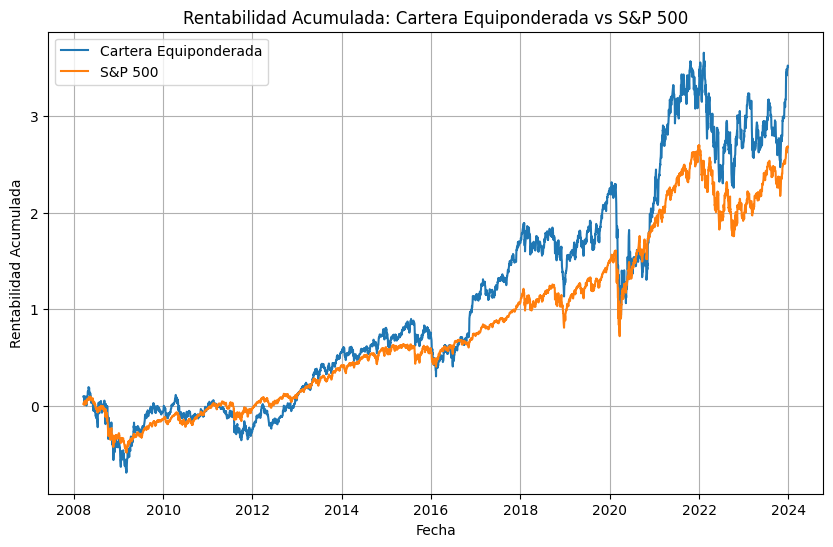

In [ ]:
tickers_financieras = ['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V']
#JPMorgan Chase (JPM)
#Bank of America (BAC)
#Wells Fargo (WFC)
#Citigroup (C)
#Goldman Sachs (GS)
#Morgan Stanley (MS)
#American Express (AXP)
#Visa (V)
comparar_rentabilidad(tickers_financieras,start_date, end_date)

[*********************100%%**********************]  7 of 7 completed


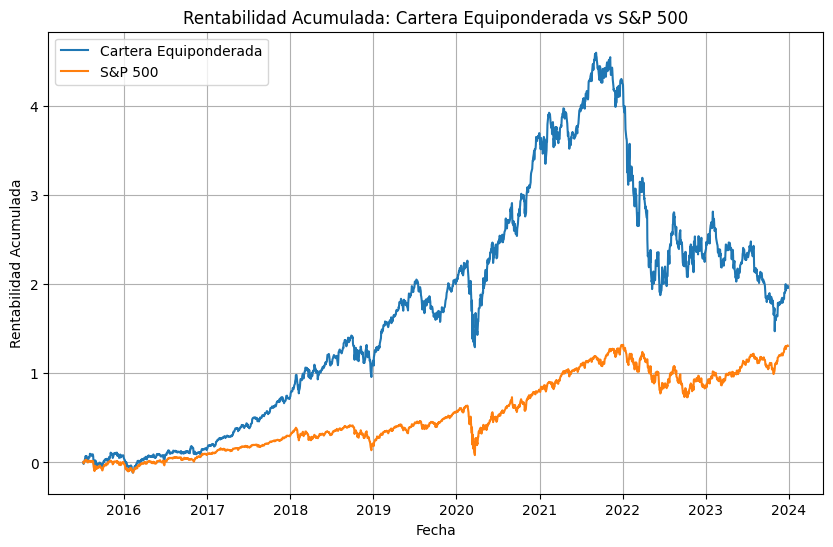

In [ ]:
tickers_variados = ['PFE','EL','PAYC','DIS','NFLX','PYPL']
#Moderna (MRNA)
#Pfizer (PFE)
#Estee Lauder (EL)
#Paycom Software (PAYC)
#Disney (DIS)
#Netflix (NFLX)
#PayPal Holdings (PYPL)
comparar_rentabilidad(tickers_variados,start_date, end_date )

[*********************100%%**********************]  7 of 7 completed


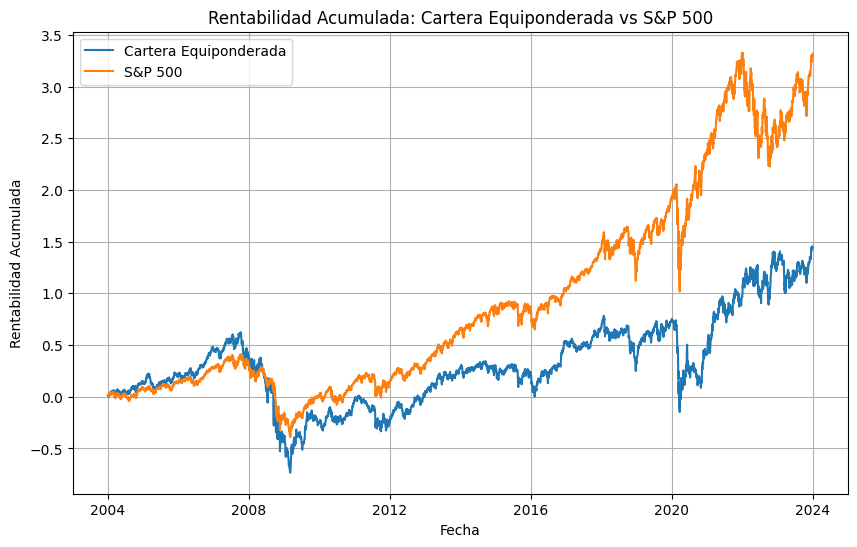

In [ ]:
#ExxonMobil - XOM
#Chevron - CVX
#Citigroup - C
#Bank of America - BAC
#IBM - IBM
#AIG (American International Group) - AIG
tickers_malos = ['XOM','CVX','C','BAC','IBM','AIG']
comparar_rentabilidad(tickers_malos,start_date, end_date )

# Crear una cartera con rotación anual, quitando cada año las dos con peor rendimiento y agregando las dos con mejor rendimiento, que no estaban previamente en la cartera

In [ ]:
def crear_cartera_con_rotacion(tickers_iniciales, start_year, end_year):
    # Definir fechas
    start_date = f'{start_year}-01-01'
    end_date = f'{end_year}-12-31'

    # Descargar datos de los tickers iniciales y del S&P 500
    tickers = tickers_iniciales + ['^GSPC']
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']


    # Descargar datos de todos los tickers del S&P 500
    data_all = yf.download(sp500_tickers_list, start=start_date, end=end_date)['Adj Close']


    # Inicializar la cartera
    cartera = tickers_iniciales.copy()
    historial_cartera = []
    cartera_valores = pd.DataFrame(index=data.index)

    for year in range(start_year, end_year):
        year_start = f'{year}-01-01'
        year_end = f'{year}-12-31'

        # Obtener datos para el año en cuestión, incluyendo los nuevos tickers en la cartera
        data = yf.download(cartera + ['^GSPC'], start=start_date, end=end_date)['Adj Close']  # Update data to include new tickers
        precios_anuales = data.loc[year_start:year_end, cartera]
        rendimientos_anuales = precios_anuales.pct_change(fill_method=None).sum()

        # Encontrar los 2 peores rendimientos
        peores = rendimientos_anuales.nsmallest(2).index.tolist()

        # Eliminar las 2 peores acciones de la cartera
        cartera = [ticker for ticker in cartera if ticker not in peores]

        # Encontrar los 2 mejores rendimientos globales fuera de la cartera
        mejores_globales = data_all.loc[year_start:year_end].pct_change(fill_method=None).sum().sort_values(ascending=False)
        mejores_nuevas = [ticker for ticker in mejores_globales.index if ticker not in cartera and ticker != '^GSPC'][:2]

        # Agregar las 2 mejores acciones a la cartera
        cartera.extend(mejores_nuevas)

        # Almacenar el valor de la cartera para ese año
        available_tickers = [t for t in cartera if t in data.columns]
        cartera_valores[year] = data.loc[year_start:year_end, available_tickers].mean(axis=1)


        historial_cartera.append((year, cartera.copy()))

    # Calcular rentabilidad acumulada de la cartera y del S&P 500
    cartera_valores['Cartera'] = cartera_valores.mean(axis=1)
    cartera_rent_acum = (1 + cartera_valores['Cartera'].pct_change(fill_method=None)).cumprod() - 1
    sp500_rent_acum = (1 + data['^GSPC'].pct_change()).cumprod() - 1

     # Calcular la rentabilidad sin rotar la cartera
    data_inicial = yf.download(tickers_iniciales, start=start_date, end=end_date)['Adj Close']
    returns_inicial = data_inicial.pct_change().dropna()

    # Crear una cartera equiponderada
    weights = np.ones(len(tickers_iniciales)) / (len(tickers_iniciales))
    cartera_returns_inicial = returns_inicial.iloc[:, :].dot(weights)

    # Calcular la rentabilidad acumulada
    cartera_cumulative_returns = (1 + cartera_returns_inicial).cumprod() - 1

    # Graficar la rentabilidad acumulada
    plt.figure(figsize=(14, 7))
    plt.plot(cartera_rent_acum, label='Cartera Rotativa')
    plt.plot(sp500_rent_acum, label='S&P 500')
    plt.plot(cartera_cumulative_returns, label='Cartera sin rotar')
    plt.title('Rentabilidad Acumulada: Cartera Rotativa vs S&P 500 vs Cartera sin rotar')
    plt.xlabel('Fecha')
    plt.ylabel('Rentabilidad Acumulada')
    plt.legend()
    plt.grid(True)
    plt.show()

    return historial_cartera

[*********************100%%**********************]  11 of 11 completed
[**********************55%%                      ]  275 of 503 completed

$UAL: possibly delisted; No price data found  (1d 2004-01-01 -> 2023-12-31)


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['GEV', 'SW', 'SOLV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1072933200, endDate = 1703998800")
ERROR:yfinance:['UAL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2004-01-01 -> 2023-12-31)')
[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  11 of 11 c

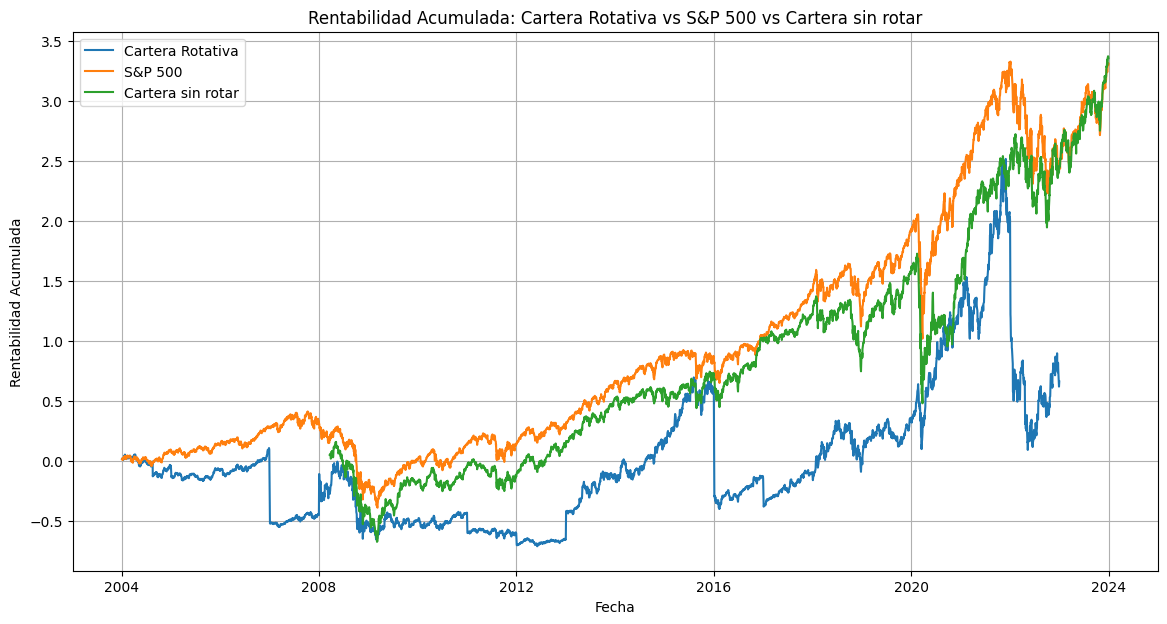

Año 2004: ['GE', 'MSFT', 'GOOGL', 'XOM', 'CVX', 'C', 'BAC', 'IBM', 'AXON', 'MNST']
Año 2005: ['GE', 'MSFT', 'GOOGL', 'XOM', 'CVX', 'C', 'BAC', 'MNST', 'NDAQ', 'ISRG']
Año 2006: ['GE', 'MSFT', 'GOOGL', 'XOM', 'CVX', 'C', 'BAC', 'MNST', 'ICE', 'AKAM']
Año 2007: ['GE', 'MSFT', 'GOOGL', 'XOM', 'CVX', 'BAC', 'MNST', 'ICE', 'FSLR', 'MOS']
Año 2008: ['MSFT', 'XOM', 'CVX', 'BAC', 'MNST', 'ICE', 'FSLR', 'MOS', 'DLTR', 'AAL']
Año 2009: ['MSFT', 'CVX', 'BAC', 'MNST', 'ICE', 'FSLR', 'MOS', 'DLTR', 'BLDR', 'CBRE']
Año 2010: ['MSFT', 'CVX', 'MNST', 'ICE', 'FSLR', 'MOS', 'DLTR', 'CBRE', 'NFLX', 'LVS']
Año 2011: ['MSFT', 'CVX', 'MNST', 'ICE', 'MOS', 'DLTR', 'CBRE', 'LVS', 'CTRA', 'DPZ']
Año 2012: ['MSFT', 'MNST', 'ICE', 'MOS', 'CBRE', 'LVS', 'CTRA', 'DPZ', 'REGN', 'BLDR']
Año 2013: ['MSFT', 'ICE', 'CBRE', 'LVS', 'CTRA', 'DPZ', 'REGN', 'BLDR', 'TSLA', 'NFLX']
Año 2014: ['MSFT', 'ICE', 'CBRE', 'DPZ', 'REGN', 'BLDR', 'TSLA', 'NFLX', 'SWKS', 'ENPH']
Año 2015: ['MSFT', 'ICE', 'DPZ', 'REGN', 'BLDR', 'TSLA',

In [ ]:
tickers_iniciales = ['GE', 'MSFT', 'GOOGL', 'XOM','CVX','C','BAC','IBM','AIG', 'V']
historial_cartera = crear_cartera_con_rotacion(tickers_iniciales, 2004, 2023)
# Mostrar el historial de la cartera
for year, cartera in historial_cartera:
    print(f'Año {year}: {cartera}')


Vemos en este ejemplo que se representamente gráficamente la conocida expresión muy usada en mundo de las finanzas e inversiones: **"Rentabilidades pasadas no presuponen rentabilidades futuras"**. En efecto, en nuestro caso, hemos ido quitando las que peor lo habían hecho en el año y hemos añadido las que mejor, y nos ha ido bastante peor que si no hubieramos rotado la cartera. Esto puede haber pasado porque salimos de posiciones con pérdidas sin esperar a su posible recuperación. De esta forma perdemos en la bajada pero no estamos ahí para la subida. Y viceversa, si cogemos un activo que lo ha hecho bien en el año anterior, seguramente estará alto de precio y es posible que al año siguiente le pueda ir peor. En este caso, compramos caro y encima estamos posicionados para que nos penalice la bajada de precio.


Con todo esto vemos que, para poder componer una buena cartera de inversión, fijarnos sólo en rentabilidades pasadas, no va a resultar un buen método. Es necesario hacer un estudio con muchas más variables, encontrar patrones en dichos datos y poder así encontrar un método más robusto de predicción de rentabilidades, que es lo que vamos a desarrollar en este TFM.